In [2]:
import numpy as np 
import pandas as pd 

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches


Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## RESEARCH QUESTIONS

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

In [4]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

# df['Year'] = df['Year'].apply(pd.to_datetime)
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df1 = df.isnull().sum()
df1


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Count the number of zero values in each column
num_zero_values = df.eq(0).sum()

# Display the number of zero values in each column
print(num_zero_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                      848
Alcohol                              0
percentage expenditure             611
Hepatitis B                          0
Measles                            983
 BMI                                 0
under-five deaths                  785
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    130
Schooling                           28
dtype: int64


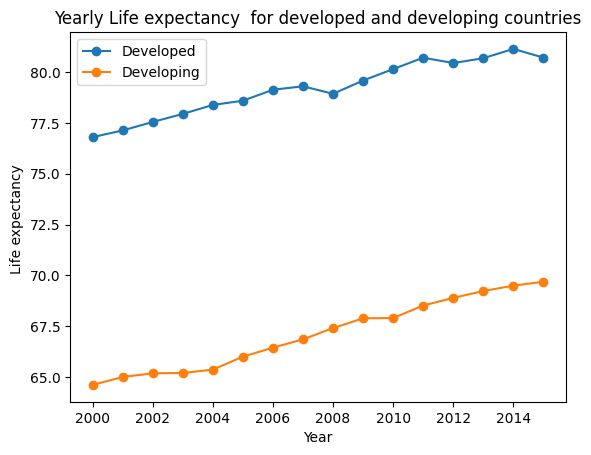

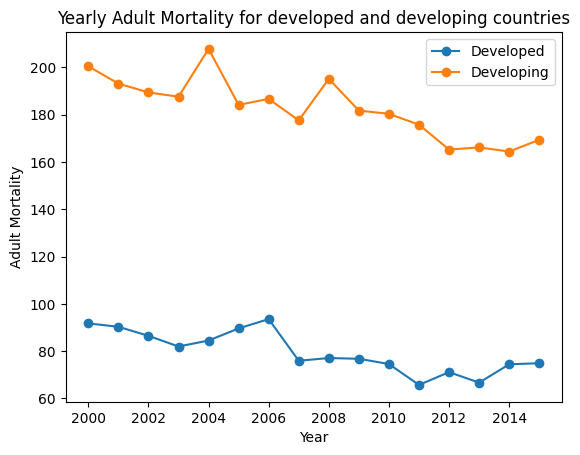

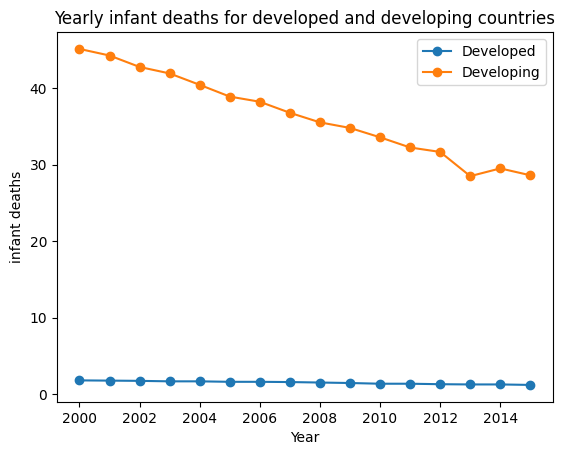

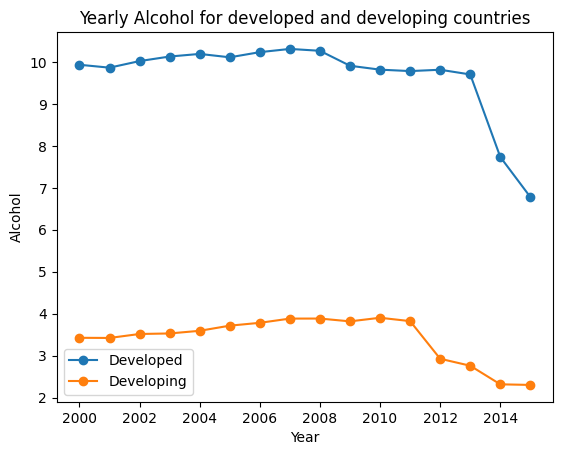

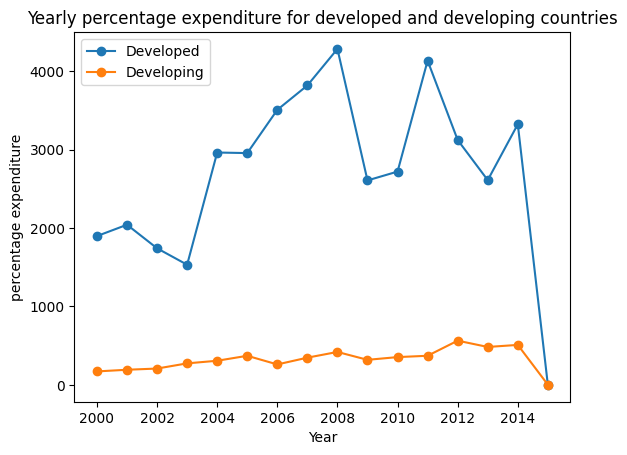

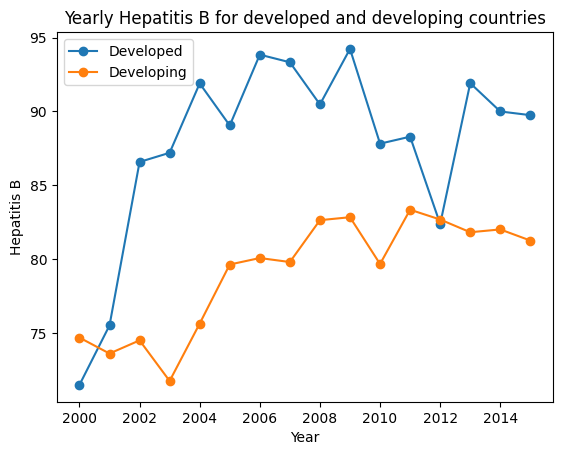

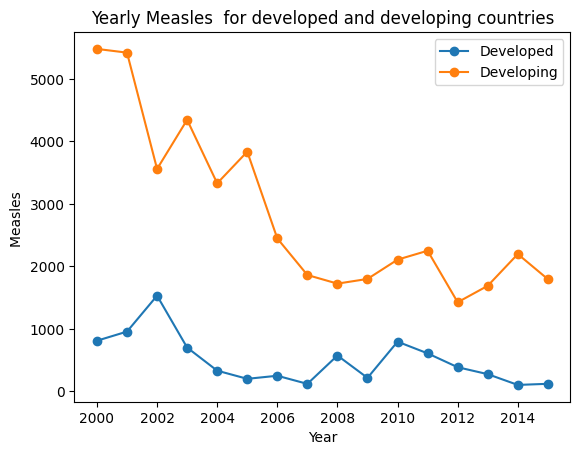

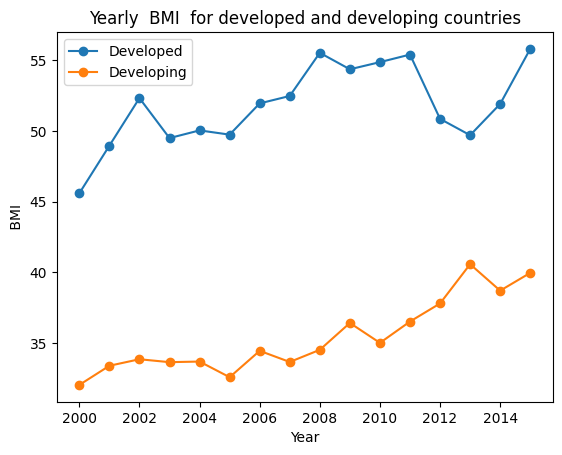

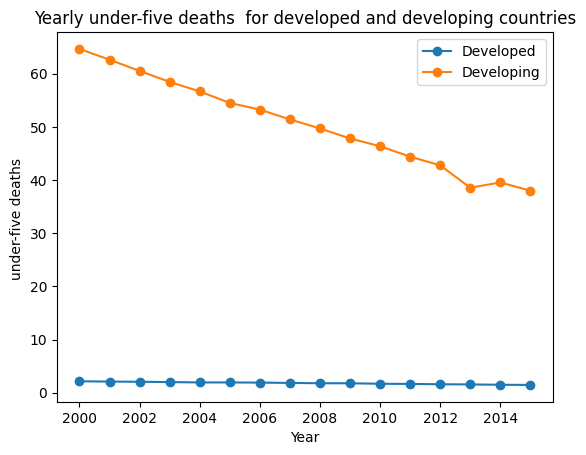

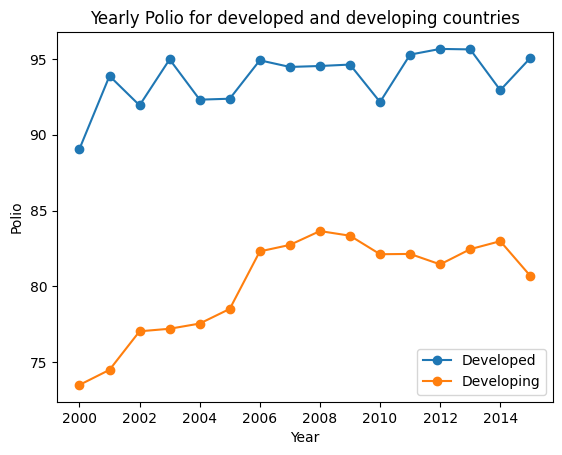

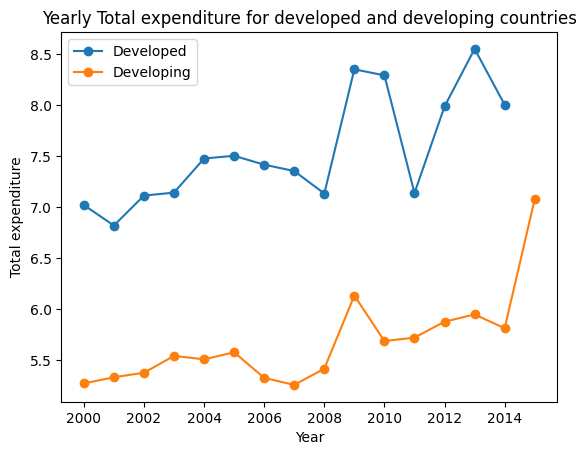

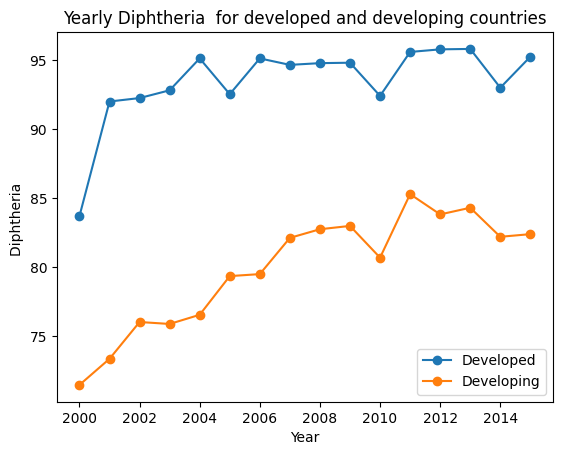

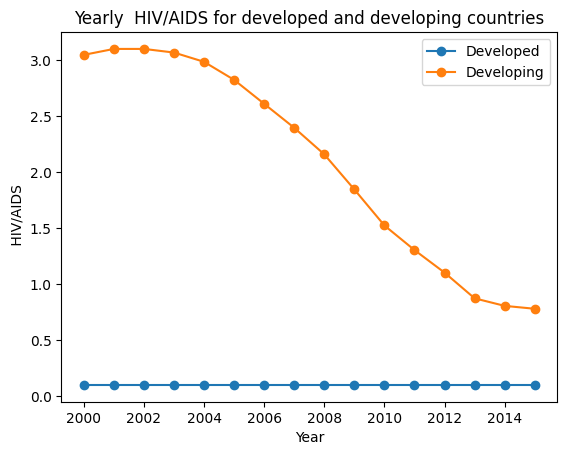

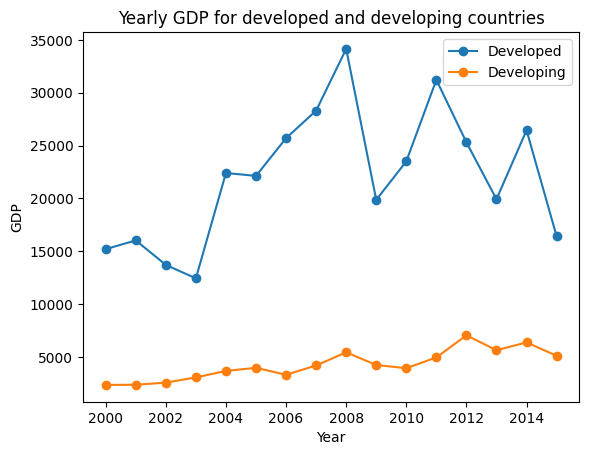

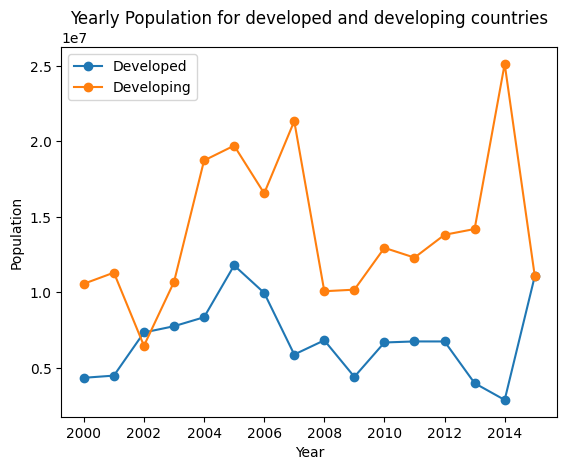

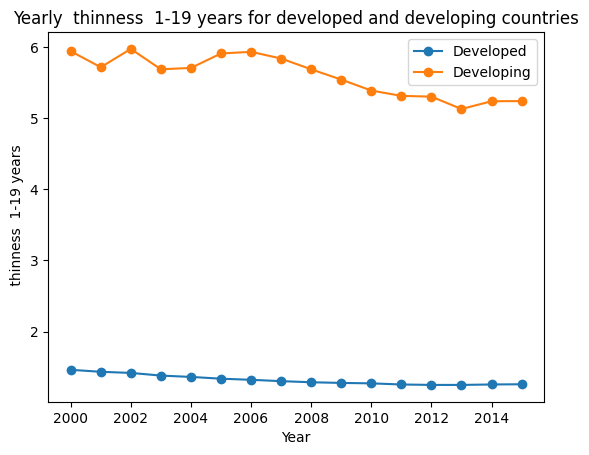

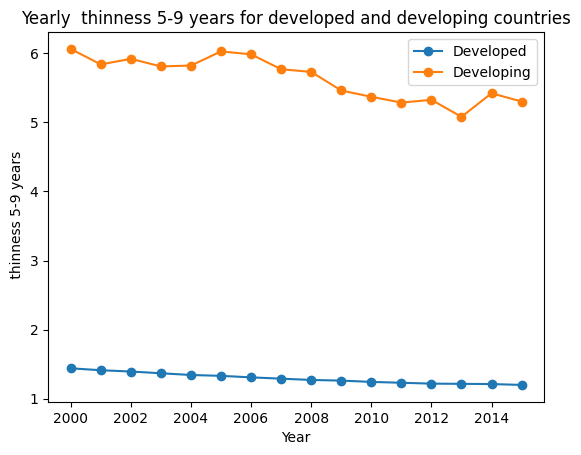

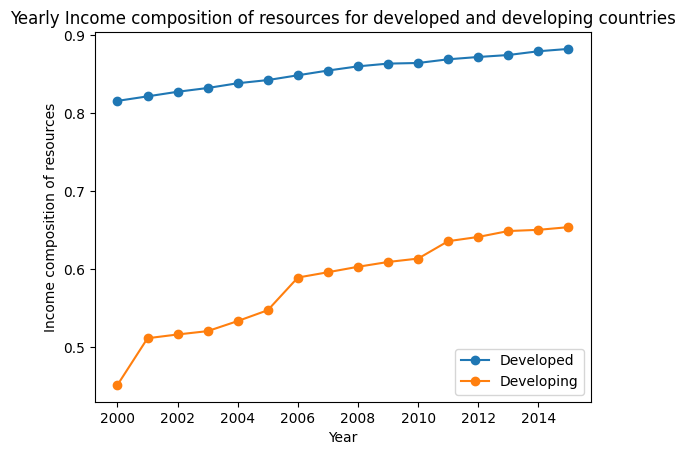

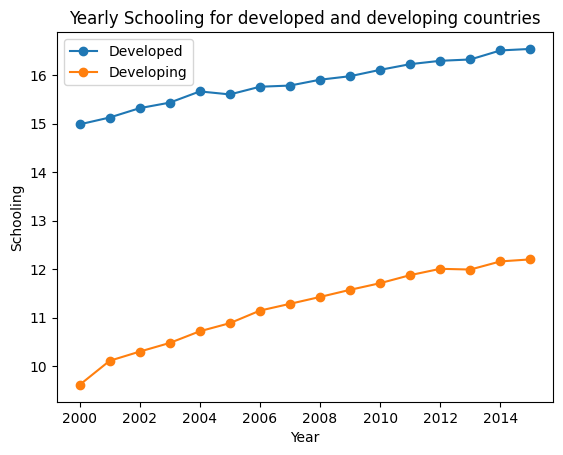

In [ ]:
columns=list(df.columns )
for column in columns:
    if column=='Country' or column=='Year' or column=='Status':
        continue

    # Group the data by year and country status, and filter for only "Developed" countries
    dev_df = df[df['Status'] == 'Developed'].groupby(['Year', 'Status'])[column].mean()

    # Group the data by year and country status, and filter for only "Developing" countries
    devg_df = df[df['Status'] == 'Developing'].groupby(['Year', 'Status'])[column].mean()

    # Reset the index to access the year and column values
    dev_df = dev_df.reset_index()
    devg_df = devg_df.reset_index()

    # Create a line plot of the column values by year for both developed and developing countries
    plt.plot(dev_df['Year'], dev_df[column], marker='o', label='Developed')
    plt.plot(devg_df['Year'], devg_df[column], marker='o', label='Developing')

    # Add axis labels and a title
    plt.xlabel('Year')
    plt.ylabel(str(column))
    plt.title(f'Yearly {column} for developed and developing countries')
    # ax.set_xticks(np.arange(len()) + bar_width / 2)

    # Add a legend to differentiate between developed and developing countries
    plt.legend()

    # Show the plot
    plt.show()

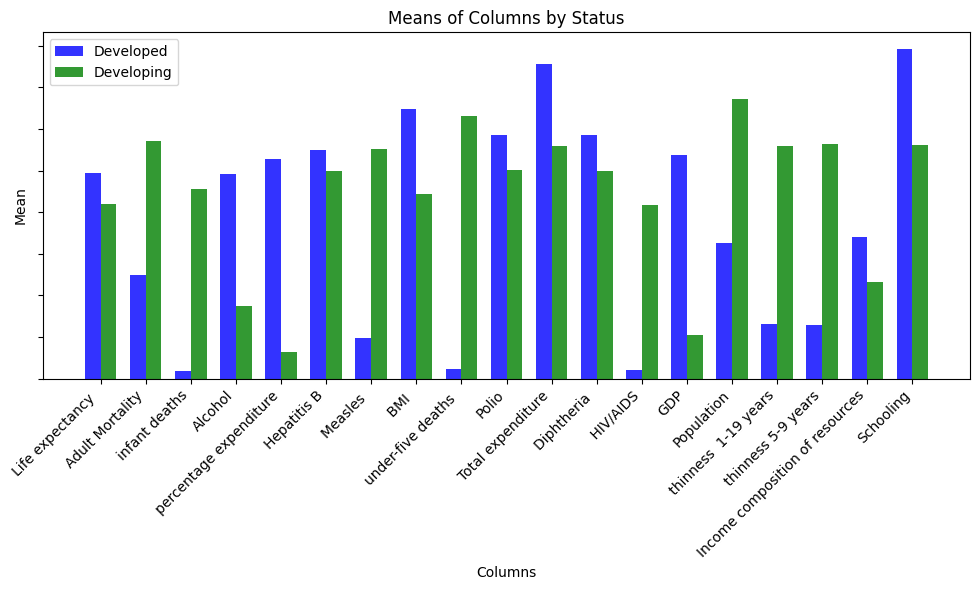

In [ ]:
# Create dictionary of means for each column and status
developed_means = {}
developing_means = {}

for column in df.columns:
    if column != "Country" and column != "Status" and column != "Year":
        developed_mean = df[df['Status'] == 'Developed'][column].mean() 
        developing_mean = df[df['Status'] == 'Developing'][column].mean() 
        
        # Check if mean is too high and adjust accordingly
        while developed_mean > 2 or developing_mean > 2:
            developed_mean /= 2
            developing_mean /= 2
        
        developed_means[column] = developed_mean
        developing_means[column] = developing_mean

# Create bar chart of means for each column and status
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

developed_vals = list(developed_means.values())
developed_keys = list(developed_means.keys())
developed_bars = ax.bar(np.arange(len(developed_vals)), developed_vals, bar_width,
                        alpha=opacity, color='b', label='Developed')

developing_vals = list(developing_means.values())
developing_keys = list(developing_means.keys())
developing_bars = ax.bar(np.arange(len(developing_vals)) + bar_width, developing_vals, bar_width,
                         alpha=opacity, color='g', label='Developing')

ax.set_xlabel('Columns')
ax.set_ylabel('Mean')
ax.set_title('Means of Columns by Status')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')


vals = ax.get_yticks()
ax.set_yticklabels([])

ax.set_xticks(np.arange(len(developed_vals)) + bar_width / 2)
ax.set_xticklabels(developed_keys)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Get list of columns with missing values
df1 = df.isnull().sum()
nan_cols = df1[df1 > 0].index.tolist()


for column in nan_cols:
    # Get list of countries with missing values in the current column
    null_countries = df[df[column].isnull()].groupby('Country')[column].sum().index.tolist()
    
    for country in null_countries:
        # Get the sum of values for the current country in the current column
        value = df[df["Country"] == country][column].sum()
        
        # If the sum of values is 0, the country has no valid data for the current column
        if value == 0.0:
            # Get the country's status (developed or developing)
            status_df = df[df['Country'] == country]
            status = status_df['Status'].iloc[0]
            
            # If the country is developing, replace missing values with the mean of all developing countries for the current column
            if status == "Developing":
                mean_value = df.loc[df['Status'] == 'Developing', column].mean()
                df.loc[(df['Country'] == country) & (df[column].isnull()), column] = mean_value
            # If the country is developed, replace missing values with the mean of all developed countries for the current column
            else:
                mean_value = df.loc[df['Status'] == 'Developed', column].mean()
                df.loc[(df['Country'] == country) & (df[column].isnull()), column] = mean_value
        # If the sum of values is not 0, the country has valid data for the current column
        else:
            # Use linear interpolation to fill missing values for the current country in the current column
            df.loc[(df['Country'] == country) & (df[column].isnull()), column] = df[df['Country'] == country][column].interpolate()
            try:
                df.loc[(df['Country'] == country) & (df[column].isnull()), column] = df[df['Country'] == country][column].bfill().ffill()
            except:
                pass


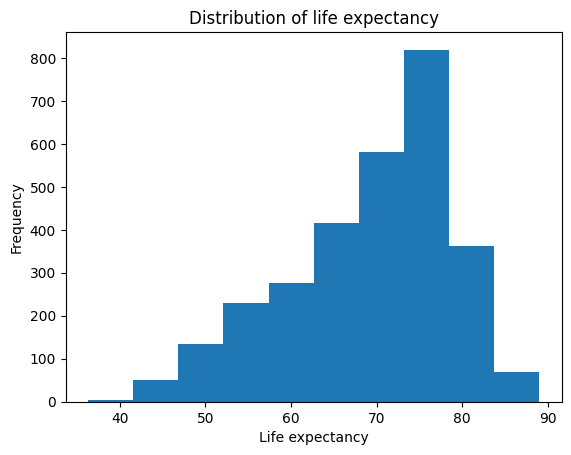

36.3


In [ ]:
plt.hist(df['Life expectancy '])
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of life expectancy')
plt.show()
print(df['Life expectancy '].min())


In [ ]:
min_life_expectancy_index = df['Life expectancy '].idxmin()
print(df.loc[min_life_expectancy_index])

Country                                 Haiti
Year                                     2010
Status                             Developing
Life expectancy                          36.3
Adult Mortality                         682.0
infant deaths                              23
Alcohol                                  5.76
percentage expenditure              36.292918
Hepatitis B                              68.0
Measles                                     0
 BMI                                     44.2
under-five deaths                          58
Polio                                    66.0
Total expenditure                         8.9
Diphtheria                               66.0
 HIV/AIDS                                 1.9
GDP                                662.279518
Population                          9999617.0
 thinness  1-19 years                     4.0
 thinness 5-9 years                       4.0
Income composition of resources          0.47
Schooling                         

In 2010, Haiti experienced a devastating earthquake that struck on January 12. The earthquake had a magnitude of 7.0 and was centered approximately 25 kilometers west of Port-au-Prince, the capital city of Haiti. The earthquake caused widespread damage to buildings and infrastructure, and the death toll is estimated to have been between 230,000 and 316,000 people, with many more injured and displaced. The earthquake was one of the deadliest in history.

In [ ]:
haiti_df = df.loc[df['Country'] == 'Haiti']
haiti_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1122,Haiti,2015,Developing,63.5,24.0,14,0.01,0.000000,6.0,0,49.9,18,56.0,7.56,6.0,0.5,814.546395,171161.0,3.9,3.9,0.490,9.1
1123,Haiti,2014,Developing,63.1,245.0,14,0.01,5.103249,48.0,0,48.8,19,55.0,7.56,48.0,0.5,83.114812,1572466.0,3.9,3.9,0.487,9.1
1124,Haiti,2013,Developing,62.7,253.0,14,5.68,4.989712,68.0,0,47.7,19,67.0,8.10,68.0,0.5,81.265673,1431776.0,3.9,3.9,0.483,9.1
1125,Haiti,2012,Developing,62.3,259.0,15,5.68,26.379425,68.0,0,46.5,20,67.0,9.88,67.0,0.8,766.843762,128921.0,3.9,3.9,0.477,8.9
1126,Haiti,2011,Developing,62.3,259.0,15,5.68,4.106484,68.0,0,45.3,20,67.0,1.41,68.0,1.5,74.935845,114554.0,4.0,4.0,0.470,8.7
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,68.0,0,44.2,58,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1128,Haiti,2009,Developing,62.5,251.0,16,5.85,41.300795,68.0,0,43.0,21,65.0,6.68,65.0,2.0,668.297646,985287.0,4.1,4.1,0.466,8.5
1129,Haiti,2008,Developing,62.1,259.0,16,5.95,63.831957,68.0,0,41.8,22,64.0,5.92,63.0,2.4,674.756415,97529.0,4.2,4.2,0.462,8.4
1130,Haiti,2007,Developing,61.8,266.0,17,6.08,56.778587,68.0,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
1131,Haiti,2006,Developing,61.1,28.0,17,6.18,6.995556,68.0,0,39.6,23,61.0,5.70,6.0,3.3,55.476260,949457.0,4.3,4.3,0.455,8.3


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 5 ): </h1>

<b>What is the impact of schooling on the lifespan of humans?</b>
</div>

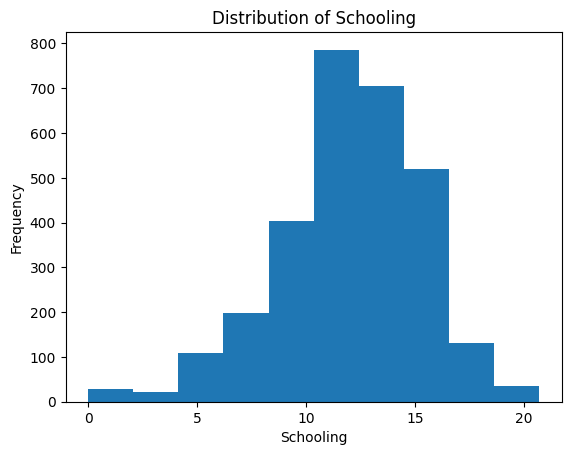

12.11614344958014


In [ ]:
plt.hist(df['Schooling'])
plt.xlabel('Schooling')
plt.ylabel('Frequency')
plt.title('Distribution of Schooling')
plt.show()

# Replace zero values with NaN
df['Schooling'] = df['Schooling'].replace(0, np.nan)

# Interpolate missing values (including zero values)
df['Schooling'] = df.groupby('Country')['Schooling'].apply(lambda x: x.interpolate())

print(df["Schooling"].mean())


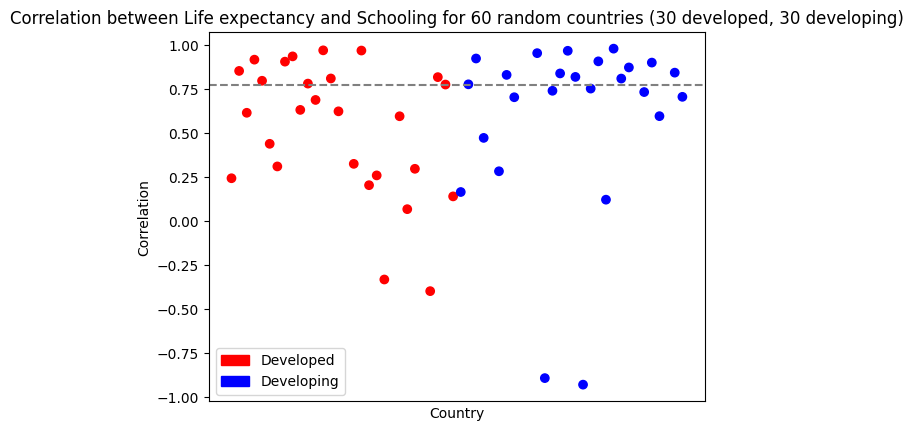

In [ ]:
# Separate the data for developed and developing countries
dev_data = df.loc[df['Status'] == 'Developed']
dev_corr_data = []
for country in dev_data['Country'].unique():
    data = dev_data.loc[dev_data['Country'] == country]
    corr = data['Life expectancy '].corr(data['Schooling'])
    dev_corr_data.append({'Country': country, 'Correlation': corr})

dev_corr_df = pd.DataFrame(dev_corr_data)
dev_corr_df['Status'] = 'Developed'

dev_corr_df = dev_corr_df.sort_values(by='Correlation', ascending=False)

dev_random_corr = dev_corr_df.sample(n=30)

dev_color_map = {'Developed': 'red'}

dev_random_corr['Color'] = dev_random_corr['Status'].map(dev_color_map)


dev_random_corr

dev_x = dev_random_corr['Country']
dev_y = dev_random_corr['Correlation']
dev_colors = dev_random_corr['Color']


# Repeat the same steps for developing countries
dev_data = df.loc[df['Status'] == 'Developing']
dev_corr_data = []
for country in dev_data['Country'].unique():
    data = dev_data.loc[dev_data['Country'] == country]
    corr = data['Life expectancy '].corr(data['Schooling'])
    dev_corr_data.append({'Country': country, 'Correlation': corr})

dev_corr_df = pd.DataFrame(dev_corr_data)
dev_corr_df['Status'] = 'Developing'

dev_corr_df = dev_corr_df.sort_values(by='Correlation', ascending=False)

dev_random_corr = dev_corr_df.sample(n=30)

dev_color_map = {'Developing': 'blue'}

dev_random_corr['Color'] = dev_random_corr['Status'].map(dev_color_map)

dev_random_corr

dev_x = pd.concat([dev_x, dev_random_corr['Country']])
dev_y = pd.concat([dev_y, dev_random_corr['Correlation']])
dev_colors = pd.concat([dev_colors, dev_random_corr['Color']])
all_corr = df['Life expectancy '].corr(df['Schooling'])

# plot scatter chart for selected countries
plt.scatter(dev_x, dev_y, c=dev_colors)
plt.axhline(y=all_corr, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Life expectancy and Schooling for 60 random countries (30 developed, 30 developing)')
plt.xticks(rotation=90) # rotate x-axis labels for better visibility
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(handles=[mpatches.Patch(color='red', label='Developed'), 
                    mpatches.Patch(color='blue', label='Developing')])
plt.show()


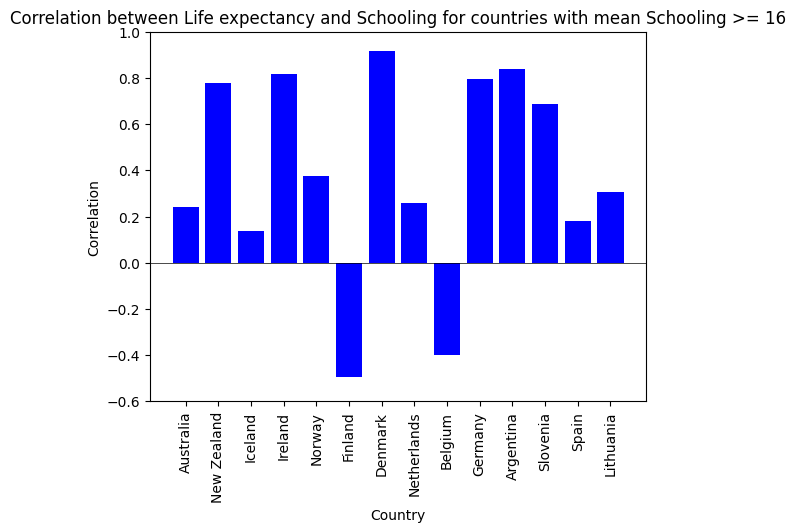

In [ ]:
# Calculate mean schooling for each country and sort by descending order
mean_schooling = df.groupby('Country')['Schooling'].mean().sort_values(ascending=False)


# Filter the countries with mean schooling >= 16
high_schooling_countries = mean_schooling[mean_schooling >= 16].index


# Calculate correlation between schooling and life expectancy for these countries
high_corr_data = []
for country in high_schooling_countries:
    data = df.loc[df['Country'] == country]
    corr = data['Life expectancy '].corr(data['Schooling'])
    high_corr_data.append({'Country': country, 'Correlation': corr})

# Convert the data to a pandas dataframe and sort by correlation
high_corr_df = pd.DataFrame(high_corr_data)
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.bar(high_corr_df['Country'], high_corr_df['Correlation'], color='blue')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Life expectancy and Schooling for countries with mean Schooling >= 16')
plt.xticks(rotation=90)
plt.ylim(-0.6, 1)
plt.show()



In [ ]:
df_Australia = df[df['Country'] == 'Australia'][['Year','Schooling', 'Life expectancy ']]
print(df_Australia)


     Year  Schooling  Life expectancy 
112  2015       20.4              82.8
113  2014       20.4              82.7
114  2013       20.3              82.5
115  2012       20.1              82.3
116  2011       19.8              82.0
117  2010       19.5              81.9
118  2009       19.1              81.7
119  2008       19.1              81.3
120  2007       19.0              81.3
121  2006       20.3              81.2
122  2005       20.3              81.0
123  2004       20.7              86.0
124  2003       20.6              83.0
125  2002       20.1              79.9
126  2001       20.5              79.9
127  2000       20.4              79.5


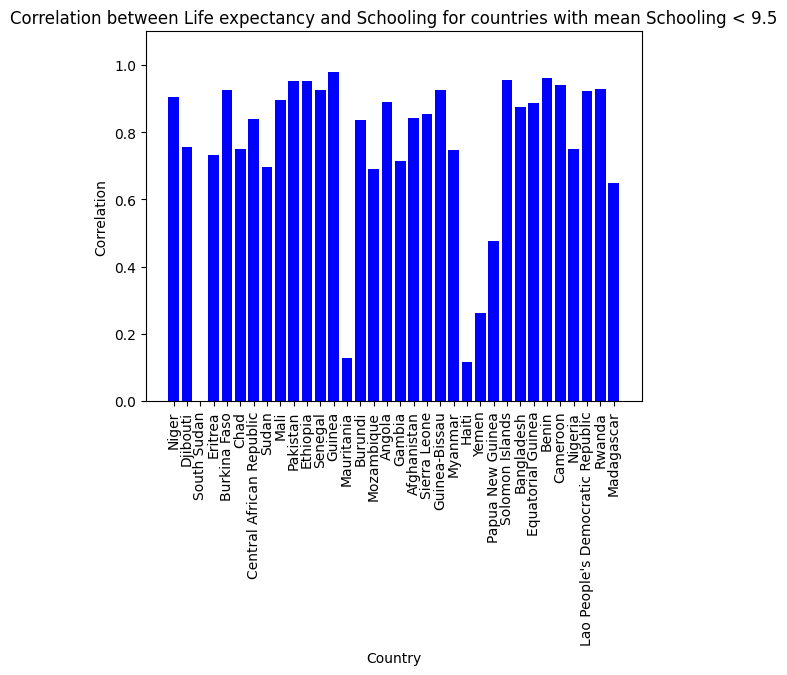

In [ ]:
# Calculate mean schooling for each country and sort by descending order
mean_schooling = df.groupby('Country')['Schooling'].mean().sort_values(ascending=True)

# Filter the countries with mean schooling <9.5
high_schooling_countries = mean_schooling[mean_schooling < 9.5].index


# Calculate correlation between schooling and life expectancy for these countries
high_corr_data = []
for country in high_schooling_countries:
    data = df.loc[df['Country'] == country]
    corr = data['Life expectancy '].corr(data['Schooling'])
    high_corr_data.append({'Country': country, 'Correlation': corr})

# Convert the data to a pandas dataframe and sort by correlation
high_corr_df = pd.DataFrame(high_corr_data)
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.bar(high_corr_df['Country'], high_corr_df['Correlation'], color='blue')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Life expectancy and Schooling for countries with mean Schooling < 9.5')
plt.xticks(rotation=90)
plt.ylim(0.0, 1.1)
plt.show()

In [ ]:
print(df[df['Country'] == 'Mauritania'][['Life expectancy ', 'Schooling']])

      Life expectancy   Schooling
1651              63.1        8.5
1652              63.0        8.5
1653              62.7        8.2
1654              62.5        7.8
1655              62.2        7.7
1656              62.0        7.6
1657              61.7        7.1
1658              61.4        7.2
1659              61.2        7.4
1660              69.0        7.2
1661              66.0        7.2
1662              64.0        6.7
1663              63.0        6.6
1664              62.0        6.5
1665              61.0        6.5
1666              60.0        6.4


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 6 ): </h1>

<b>Does Life Expectancy have positive or negative relationship with drinking alcohol?</b>
</div>

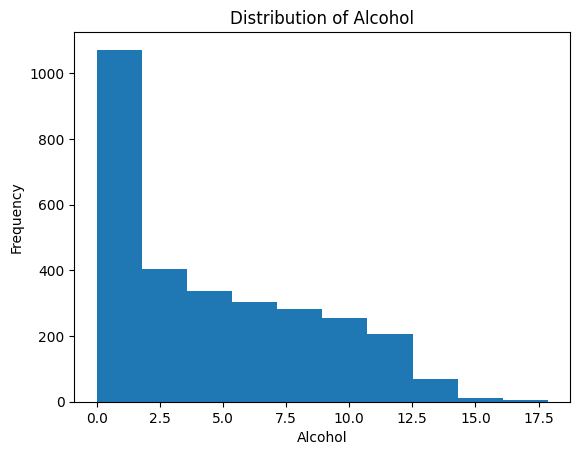

4.511471014744257


In [ ]:
plt.hist(df['Alcohol'])
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol')
plt.show()
print(df['Alcohol'].mean())

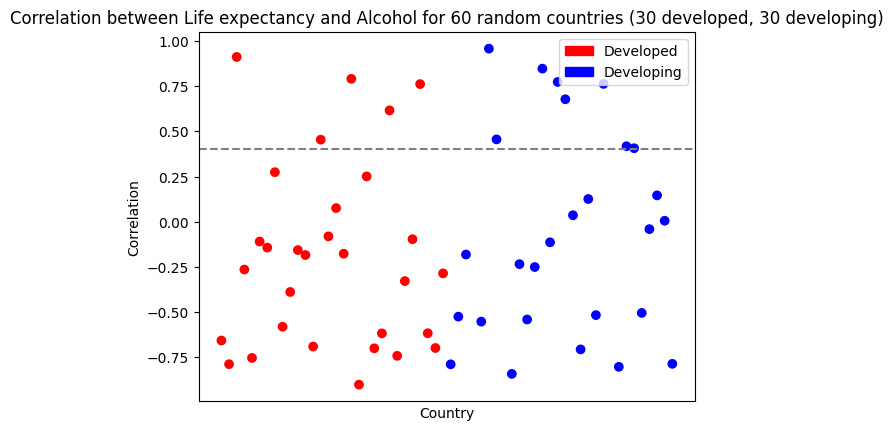

In [ ]:
# Separate the data for developed and developing countries
dev_data = df.loc[df['Status'] == 'Developed']
dev_corr_data = []
for country in dev_data['Country'].unique():
    data = dev_data.loc[dev_data['Country'] == country]
    corr = data['Life expectancy '].corr(data['Alcohol'])
    dev_corr_data.append({'Country': country, 'Correlation': corr})

dev_corr_df = pd.DataFrame(dev_corr_data)
dev_corr_df['Status'] = 'Developed'

dev_corr_df = dev_corr_df.sort_values(by='Correlation', ascending=False)

dev_random_corr = dev_corr_df.sample(n=30)

dev_color_map = {'Developed': 'red'}

dev_random_corr['Color'] = dev_random_corr['Status'].map(dev_color_map)


dev_random_corr

dev_x = dev_random_corr['Country']
dev_y = dev_random_corr['Correlation']
dev_colors = dev_random_corr['Color']


# Repeat the same steps for developing countries
dev_data = df.loc[df['Status'] == 'Developing']
dev_corr_data = []
for country in dev_data['Country'].unique():
    data = dev_data.loc[dev_data['Country'] == country]
    corr = data['Life expectancy '].corr(data['Alcohol'])
    dev_corr_data.append({'Country': country, 'Correlation': corr})

dev_corr_df = pd.DataFrame(dev_corr_data)
dev_corr_df['Status'] = 'Developing'

dev_corr_df = dev_corr_df.sort_values(by='Correlation', ascending=False)

dev_random_corr = dev_corr_df.sample(n=30)

dev_color_map = {'Developing': 'blue'}

dev_random_corr['Color'] = dev_random_corr['Status'].map(dev_color_map)

dev_random_corr

dev_x = pd.concat([dev_x, dev_random_corr['Country']])
dev_y = pd.concat([dev_y, dev_random_corr['Correlation']])
dev_colors = pd.concat([dev_colors, dev_random_corr['Color']])
all_corr = df['Life expectancy '].corr(df['Alcohol'])

plt.scatter(dev_x, dev_y, c=dev_colors)
plt.axhline(y=all_corr, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Life expectancy and Alcohol for 60 random countries (30 developed, 30 developing)')
plt.xticks(rotation=90) # rotate x-axis labels for better visibility
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(handles=[mpatches.Patch(color='red', label='Developed'), 
                    mpatches.Patch(color='blue', label='Developing')])
plt.show()


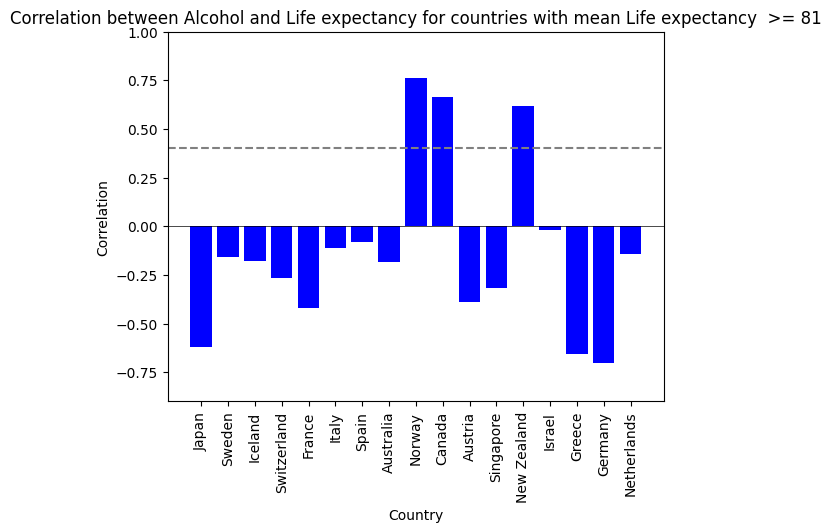

In [ ]:
# Calculate mean Life expectancy  for each country and sort by descending order
mean_life_expectancy  = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)


# Filter the countries with mean Life expectancy  >= 81
high_life_expectancy_countries = mean_life_expectancy[mean_life_expectancy >= 81].index


# Calculate correlation between Alcohol and life expectancy for these countries
high_corr_data = []
for country in high_life_expectancy_countries:
    data = df.loc[df['Country'] == country]
    corr = data['Alcohol'].corr(data['Life expectancy '])
    high_corr_data.append({'Country': country, 'Correlation': corr})

# Convert the data to a pandas dataframe and sort by correlation
high_corr_df = pd.DataFrame(high_corr_data)
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

all_corr = df['Life expectancy '].corr(df['Alcohol'])

# Plot the correlations
plt.bar(high_corr_df['Country'], high_corr_df['Correlation'], color='blue')
plt.axhline(y=all_corr, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Alcohol and Life expectancy for countries with mean Life expectancy  >= 81')
plt.xticks(rotation=90)
plt.ylim(-0.9, 1)
plt.show()

In [ ]:
print(df[df['Country'] == 'Japan'][['Life expectancy ', 'Alcohol']])

      Life expectancy   Alcohol
1314              83.7     0.01
1315              83.5     0.01
1316              83.5     7.55
1317              83.3     7.39
1318              82.5     7.39
1319              83.0     6.90
1320              83.0     7.09
1321              82.7     7.11
1322              82.6     7.29
1323              82.4     7.49
1324              82.0     7.99
1325              82.1     7.70
1326              81.9     7.83
1327              81.8     7.87
1328              81.5     8.03
1329              81.1     7.97


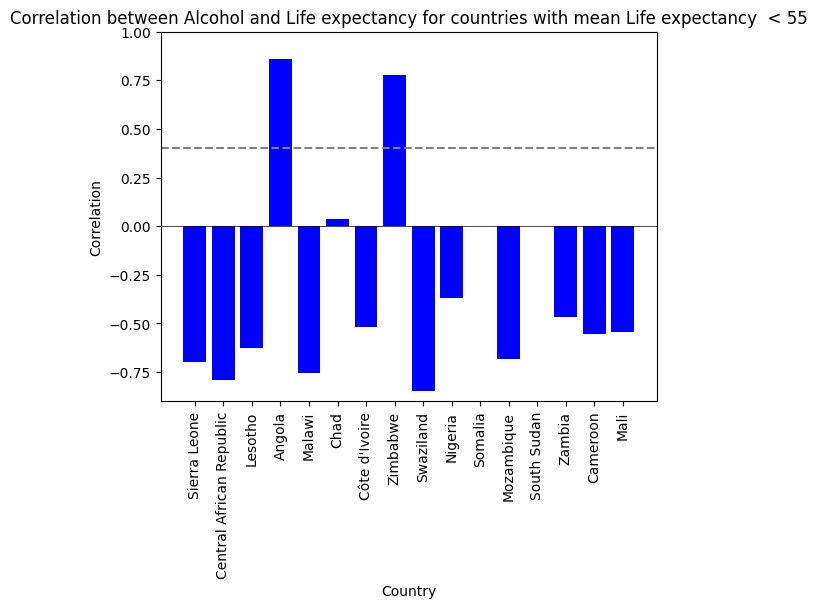

In [ ]:
# Calculate mean Life expectancy  for each country and sort by descending order
mean_life_expectancy  = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)


# Filter the countries with mean Life expectancy  >= 81
high_life_expectancy_countries = mean_life_expectancy[mean_life_expectancy < 55].index


# Calculate correlation between Alcohol and life expectancy for these countries
high_corr_data = []
for country in high_life_expectancy_countries:
    data = df.loc[df['Country'] == country]
    corr = data['Alcohol'].corr(data['Life expectancy '])
    high_corr_data.append({'Country': country, 'Correlation': corr})

# Convert the data to a pandas dataframe and sort by correlation
high_corr_df = pd.DataFrame(high_corr_data)
# high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations
plt.bar(high_corr_df['Country'], high_corr_df['Correlation'], color='blue')
plt.axhline(y=all_corr, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Alcohol and Life expectancy for countries with mean Life expectancy  < 55')
plt.xticks(rotation=90)
plt.ylim(-0.9, 1)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 1 ): </h1>

<b>Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?</b>
</div>

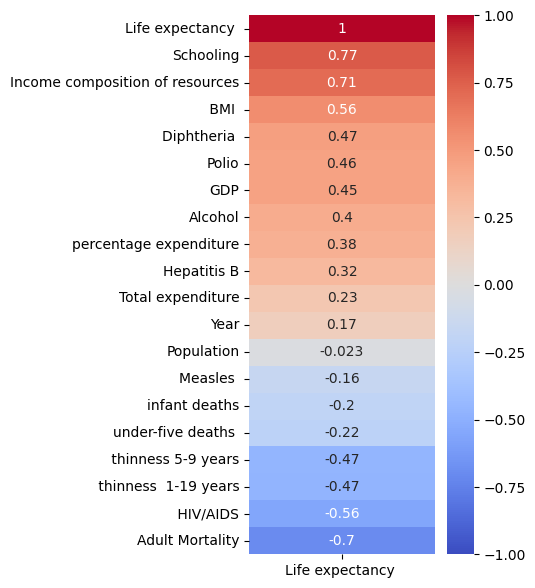

In [ ]:
# for the target variable
plt.figure(figsize=(3, 7))
target_corr = df.corr()[['Life expectancy ']].sort_values(by='Life expectancy ', ascending=False)
sns.heatmap(target_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

#### Starting from the correlation values between:
*  0.3 to 0.5 is considered "low"
*  0.5 to 0.7 is considered moderate
*   0.7 to 1 is considered "strong"

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Conclusion 1 ): </h1>

<b>From this figure, we can see that Schooling has the highest positive correlation with life expectancy, with a correlation coefficient of 0.720506. This means that as the level of schooling increases, we can expect life expectancy to increase as well.

Additionally, we can see that Income composition of resources also has a strong positive correlation with life expectancy, with a correlation coefficient of 0.694480.

The negative correlation coefficients indicate that as HIV/AIDS prevalence and adult mortality rates increase, life expectancy decreases. In other words, there is an inverse relationship between these factors and life expectancy.

Therefore, the negative correlation between HIV/AIDS and adult mortality with life expectancy suggests that reducing HIV/AIDS prevalence and adult mortality rates could lead to an increase in life expectancy. This underscores the importance of addressing these factors in efforts to improve population health and well-being.

There are also some variables with no correlation or weak correlation with life expectancy, such as  Population with a correlation coefficient of -0.018404. This means that these variables are not strongly associated with life expectancy and may not be as important in predicting life expectancy.</b>
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 2 ): </h1>

<b>Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?</b>
</div>

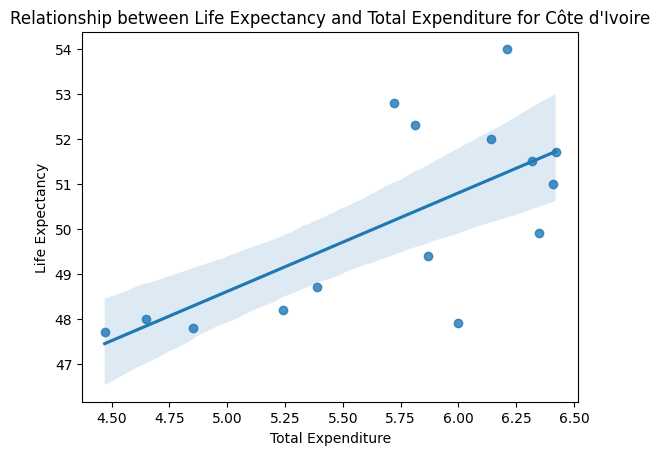

In [18]:
# Select a random country with a life expectancy below 65
countries = df.loc[df['Life expectancy '] < 65, 'Country']
random_country = np.random.choice(countries)

# Create scatter plot with regression line for the selected country
data = df[df['Country'] == random_country]
sns.regplot(x='Total expenditure', y='Life expectancy ', data=data)

# Add axis labels and a title to the plot
plt.xlabel('Total Expenditure')
plt.ylabel('Life Expectancy')
plt.title(f'Relationship between Life Expectancy and Total Expenditure for {random_country}')
# Show the plot
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Conclusion 2 ): </h1>

<p><b>Correlation</b></p>
<p>The code selects a random country from the dataset which has a life expectancy below 65 and then creates a scatter plot with a regression line for that country. The scatter plot shows the relationship between the total healthcare expenditure (% of GDP) and life expectancy for the selected country. The correlation in this context is a measure of how strong and in what direction this relationship is, i.e., how much the total healthcare expenditure and life expectancy are correlated for the selected country. A positive correlation would mean that as the total healthcare expenditure increases, so does the life expectancy, while a negative correlation would mean that as the total healthcare expenditure increases, the life expectancy decreases. The correlation coefficient ranges from -1 to +1, where a value of +1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.</p>
</div>

<br>

###  How does Infant and Adult mortality rates affect life expectancy?

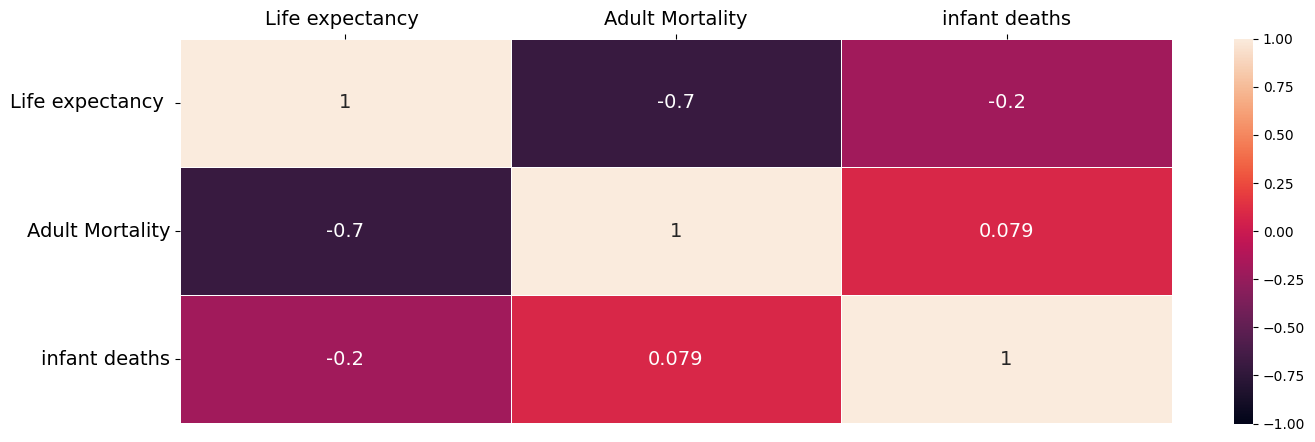

In [9]:
plt.figure(figsize=(16, 5))
sns.heatmap(df[['Life expectancy ', 'Adult Mortality', 'infant deaths']].corr(), annot=True, annot_kws={"size": 14}, vmin=-1, vmax=1, linewidth=.5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.xaxis.tick_top()

ax.tick_params(axis='x', which='both', labelsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

#### According to the heatmap, a high negative correlation of -0.7 and -0.2 is observed, which indicates that Adult Mortality and infant mortality affects life expectancy. If the countries maintain a low correlation, life expectancy can increase and will not be affected. 

### <b> Conclusion </b> 

### The governments can improve the health of their citizens in various ways. Some of them are:

*   Investing in public health, such as improving the infrastructure, equipment, supplies and health personnel.
*   Promoting democracy, which has been linked to a reduction of deaths from non-communicable diseases and transport injuries .
*   Developing ubiquitous health strategies, which focus on improving remote monitoring in older citizens.
*   Eliminating barriers to access to vaccines, especially for the most vulnerable populations.

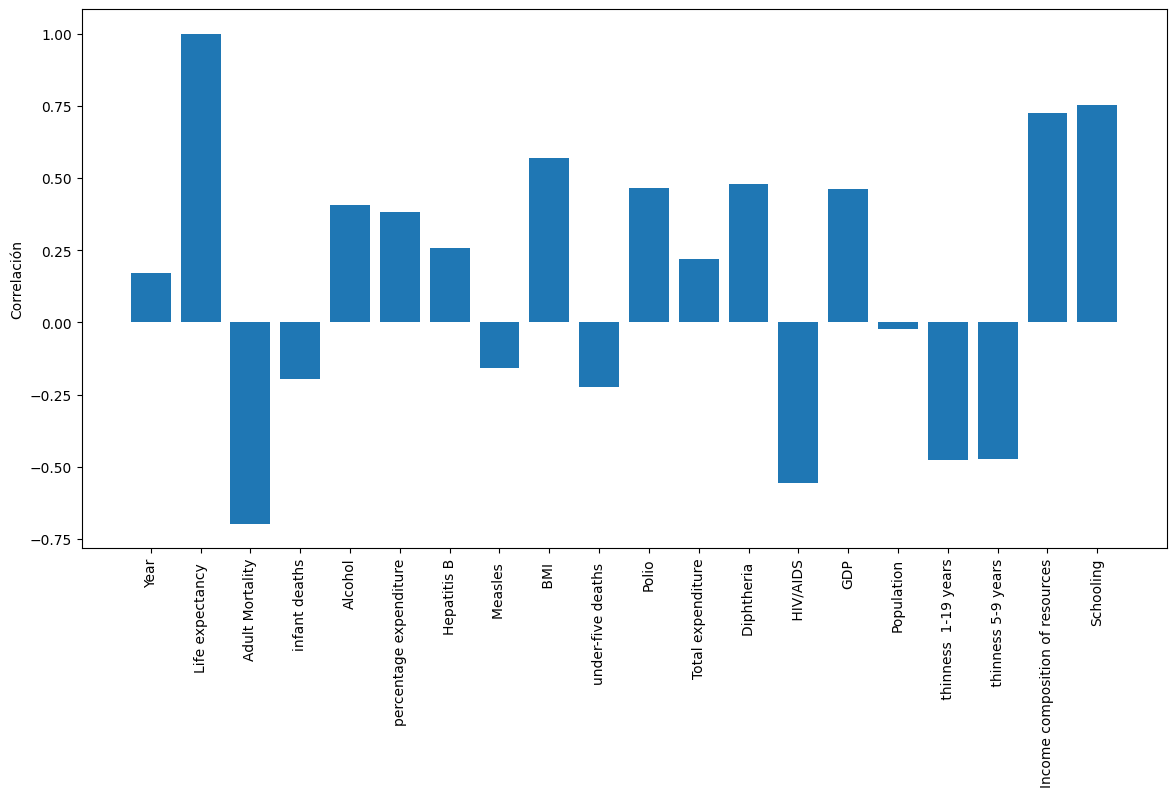

In [14]:
correlations = df.corr()['Life expectancy ']

plt.figure(figsize=(14, 7))
plt.bar(correlations.index, correlations.values)
plt.xticks(rotation=90)
plt.ylabel('Correlación')
plt.show()


####  *   Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?

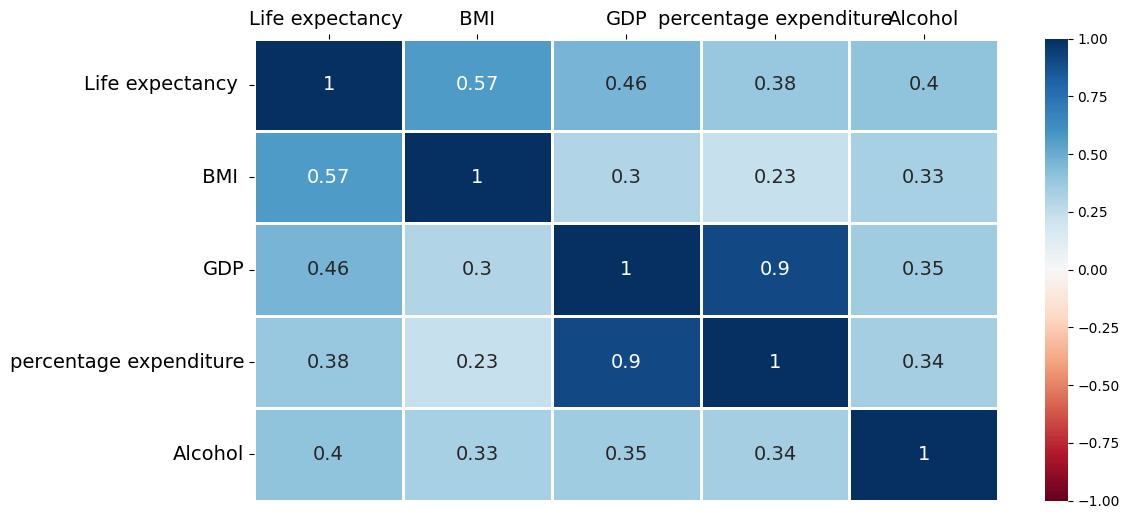

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Life expectancy ', ' BMI ', 'GDP', 'percentage expenditure', 'Alcohol']].corr(), 
            annot=True, annot_kws={"size": 14}, cmap="RdBu", vmin=-1, vmax=1, linewidth=.8)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.xaxis.tick_top()

ax.tick_params(axis='x', which='both', labelsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

#### Ans/. The BMI (Body Mass Index) is an internationally used measure that shows if you have a healthy weight in relation to your height. The BMI gives you an estimate of how healthy your body weight is. You can calculate the BMI for women, men and children from 2 years old.  Considering the correlation of the BMI body mass index is 0.51, that is moderately positive, we could conclude that there are good eating habits, lifestyle and exercise. There are no precise data on smokers, so it is not possible to make an appreciation.
#### Alcohol consumption has a low positive relationship of 0.4, which allows us to infer that life expectancy is not diminished.

### <b> Conclusions </b> 

#### 1.   Governments can maintain a positive correlation between alcohol consumption and life expectancy if they promote a moderate and responsible consumption of alcoholic beverages, especially wine, which can have benefits for cardiovascular health. However, they must also avoid excessive and abusive alcohol consumption, which can have negative effects on health and shorten life.

### 2.   Governments can help maintain the health of their citizens in various ways, such as:

*   Encouraging healthy eating in public facilities and avoiding foods that result in harmful diets.
*   Establishing policies that promote equity and social development.
*   Maintaining essential health services during emergencies and limiting direct and indirect mortality.